In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
#read in the data
mlc_data = pd.read_csv("../data/Matching Sample for NSS (100k Lines).xlsx - MLC Data Sample.csv")

In [4]:
#let's see what we're working with and that it was read in correctly
mlc_data.head()

,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


In [5]:
#let's check the tail too
mlc_data.tail()

,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
99995,QZK6F2019397,QZ,K6F,20.0,3/1/2021,Spotify,"28,549",Myuk,Sony Music Labels Inc.,魔法 - Anime Size,魔法 (Anime Size),89,1
99996,QZK6F2019397,QZ,K6F,20.0,3/1/2021,Spotify,"28,941",yama,Sony Music Labels Inc.,麻痺,麻痺,199,1
99997,SE6HN1926755,SE,6HN,19.0,3/1/2021,Spotify,"28,941",yama,Sony Music Labels Inc.,麻痺,麻痺,199,1
99998,SEYOK1669274,SE,YOK,16.0,3/1/2021,Apple,"8,970",yama,Sony Music Labels Inc.,麻痺,麻痺 - Single,198,1
99999,QZK6F2019397,QZ,K6F,20.0,2/1/2021,Spotify,"11,245",Lexie Liu,泥鞋（北京）文化传媒有限公司,黑洞 Metropolis,无限意识 Meta Ego,259,1


In [6]:
# https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/
duplicate = mlc_data[mlc_data.duplicated()]
duplicate = duplicate.sort_values(['Recording Title'])
print("Duplicate Rows :")
duplicate.info()

Duplicate Rows :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 288 to 99986
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ISRC                                       539 non-null    object 
 1   Country Code                               539 non-null    object 
 2   Registrant Code                            539 non-null    object 
 3   Year of Reference                          539 non-null    float64
 4   Usage Period                               549 non-null    object 
 5   Streaming Platform (DSP)                   549 non-null    object 
 6   Streams                                    549 non-null    object 
 7   Recording Artist                           549 non-null    object 
 8   Recording Label                            548 non-null    object 
 9   Recording Title                            549 non-null    object 
 10  Relea

In [7]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
mlc_data = mlc_data.drop_duplicates()

In [8]:
mlc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99451 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ISRC                                       97701 non-null  object 
 1   Country Code                               97764 non-null  object 
 2   Registrant Code                            97764 non-null  object 
 3   Year of Reference                          97700 non-null  float64
 4   Usage Period                               91349 non-null  object 
 5   Streaming Platform (DSP)                   95452 non-null  object 
 6   Streams                                    99451 non-null  object 
 7   Recording Artist                           99451 non-null  object 
 8   Recording Label                            98444 non-null  object 
 9   Recording Title                            99451 non-null  object 
 10  Release Title         

In [9]:
mlc_data.describe()

,Year of Reference,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
count,97700.000000,99451.000000,99451.000000
mean,19.677267,1015.395190,0.541573
std,12.653913,15586.610211,0.498271
min,0.000000,0.000000,0.000000
25%,17.000000,149.000000,0.000000
50%,19.000000,190.000000,1.000000
75%,20.000000,235.000000,1.000000
max,99.000000,818738.000000,1.000000


In [10]:
#false=0, true=1. this shows count of null values for each column.
mlc_data.isnull().sum()

ISRC                                         1750
Country Code                                 1687
Registrant Code                              1687
Year of Reference                            1751
Usage Period                                 8102
Streaming Platform (DSP)                     3999
Streams                                         0
Recording Artist                                0
Recording Label                              1007
Recording Title                                 0
Release Title                                  69
Recording Duration (Seconds)                    0
Songwriter's Listed (1 = "Yes", 0 = "No")       0
dtype: int64

In [11]:
#value counts of unique values (excluding nulls) in given column.
mlc_data['Recording Artist'].value_counts()

Various artists               964
Lil Durk                      445
Zach Bryan                    390
Youngboy Never Broke Again    333
Taylor Swift                  313
                             ... 
Maranatha! Latin                1
Nerv                            1
Farruko,Bad Bunny               1
Thibaut Garcia                  1
Loud Bunch Kids                 1
Name: Recording Artist, Length: 21149, dtype: int64

In [12]:
#value counts of unique values (excluding nulls) in given column.
mlc_data['Streaming Platform (DSP)'].value_counts()

Spotify               32078
Apple                 22069
Amazon                14327
Pandora               13742
Tidal                  3515
YouTube                2747
SoundCloud             2120
GTL                    1025
Melodyv                 826
Trebel                  817
iHeart Radio            707
AudioMack               550
NugsNet                 315
LiveXLive               200
Qoboz                   104
Midwest Tape            102
Deezer                   51
Anghami                  46
Sonos                    23
Recisio                  22
Smithsonian              21
Ultimate Guitar          19
PowerMusic                8
Wolfgangs                 4
Fan Label                 4
MixCloud                  4
Pacemaker                 3
Classical Archives        2
MonkingMe                 1
Name: Streaming Platform (DSP), dtype: int64

In [13]:
mlc_data['Usage Period'].value_counts()

3/1/2021    39408
1/1/2021    16465
2/1/2021    13451
4/1/2021    12190
5/1/2021     9835
Name: Usage Period, dtype: int64

In [14]:
#count of unique values in that column (result is x unique names in dataframe)
mlc_data['Recording Artist'].nunique()

21149

<AxesSubplot:>

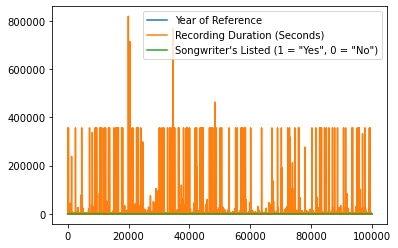

In [15]:
mlc_data.plot()

In [16]:
#set the seaborn theme, style, color palette
#sns.set(style="ticks", color_codes=True)

#make a correlation plot that looks at each variables relationship with every other variable
#and plots the distribution of each variable along the diagonal
#sns.pairplot(mlc_data);

In [17]:
#when I attempted to convert streams to int, got an error due to whitespaces. let's try to remove those
#this will require converting them to strings first
#documentation: https://stackoverflow.com/questions/22005911/convert-columns-to-string-in-pandas
#documentation: https://www.geeksforgeeks.org/pandas-strip-whitespace-from-entire-dataframe/
mlc_data['Streams'] = mlc_data['Streams'].astype(str).str.strip()

In [18]:
#to calculate based on streams, need to convert to int
#at first, was getting ValueError: count not convert string to float. need to remove commas.
mlc_data['Streams'] = mlc_data['Streams'].apply(lambda x: int(float(x.replace(',',''))))

In [19]:
#I want to try aggregating this data by streaming platform, artist, recording duration, etc to see how these factors 
#impact number of streams
#going off this documentation: https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
#let's start by grouping by artist
#and ordering by number of streams DESC
grouped_artist = mlc_data.groupby('Recording Artist')[['Streams']].sum().sort_values(['Streams'],ascending=False)
grouped_artist.head(20)

,Streams
Recording Artist,
Lil Durk,77580707
Rod Wave,76457852
Taylor Swift,65853112
Pooh Shiesty,60734440
Moneybagg Yo,44210532
Drake,33514252
Spotemgottem,30475307
DJ Khaled,30445217
Morgan Wallen,29287713


<AxesSubplot:ylabel='Recording Duration (Seconds)'>

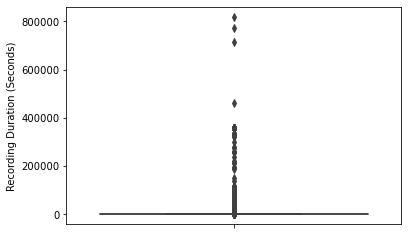

In [20]:
sns.boxplot(y=mlc_data['Recording Duration (Seconds)'])

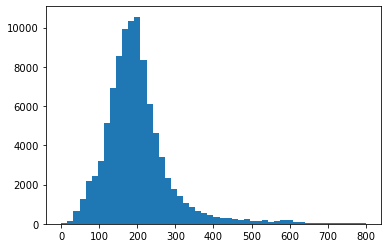

In [21]:
plt.hist('Recording Duration (Seconds)', bins = 50, range = (0, 800), data = mlc_data);

In [30]:
grouped_platform = mlc_data.groupby('Streaming Platform (DSP)')[['Streams']].sum().sort_values(['Streams'],ascending=False)

#without resetting index, it throws an error when attempting to plot, because streaming platform is viewed as index
grouped_platform = grouped_platform.reset_index()
grouped_platform.head(20)

,Streaming Platform (DSP),Streams
0,Spotify,2541603117
1,Apple,1599105573
2,Pandora,873279784
3,SoundCloud,166695457
4,YouTube,157979368
5,Amazon,149591499
6,Tidal,48743502
7,AudioMack,11991559
8,Melodyv,5349429
9,iHeart Radio,2141959


In [31]:
grouped_platform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Streaming Platform (DSP)  29 non-null     object
 1   Streams                   29 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 592.0+ bytes


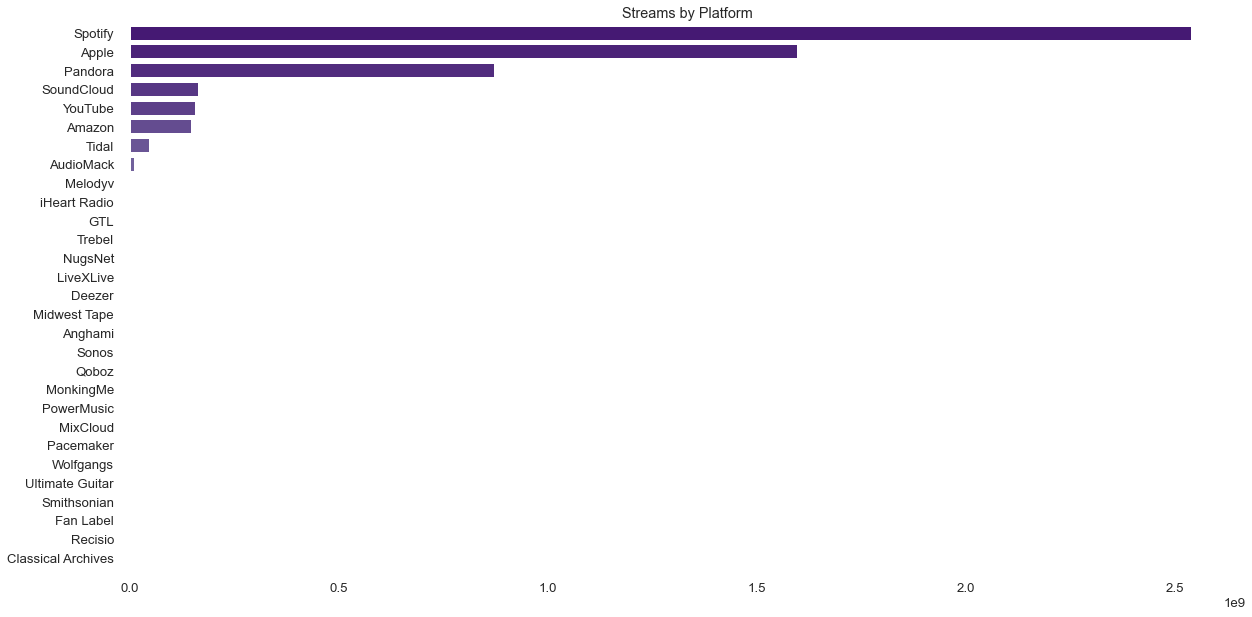

In [37]:
plt.figure(figsize = (20,10))
sns.set(style="white")
sns.set_style({'axes.facecolor':'white', 'grid.color': '.8', 'font.family':'Arial'})
sns.set_context("poster", font_scale = .6)
sns.barplot(x = 'Streams', y = 'Streaming Platform (DSP)', data = grouped_platform, palette = 'Purples_r')
plt.xlabel('')
plt.ylabel('')
sns.despine(left=True, right=True, bottom=True, top=True)
plt.title('Streams by Platform');